# All localsearch algorithms examples + plotting

## imports

In [1]:
# read data
from lspy.io.tsplib import read_tsplib

# move functions
from lspy.localsearch.move.tsp_array_swap import TspArraySwap
from lspy.localsearch.move.array_reverse_order import ArrayReverseOrder
from lspy.localsearch.move.multi_neighbourhood import MultiNeighbourhood

# evaluation function
from lspy.evaluation.tsp_evaluation_function import TspEvaluationFunction

# Problem class
from lspy.problem.array_problem import ArrayProblem

# termination functions
from lspy.termination.min_temperature_termination_criterion import MinTemperatureTerminationCriterion
from lspy.termination.max_seconds_termination_criterion import MaxSecondsTerminationCriterion

# simulated annealing
from lspy.localsearch.simulatedannealing.simulated_annealing import SimulatedAnnealing
from lspy.localsearch.simulatedannealing.geometric_cooling_function import GeometricCoolingFunction
from lspy.localsearch.simulatedannealing.cnst_iterations_temp_function import CnstIterationsTempFunction

# steepest descent 
from lspy.localsearch.steepestdescent.steepest_descent import SteepestDescent

# tabu search
from lspy.localsearch.tabusearch.tabu_search import TabuSearch

# variable neighbourhood search
from lspy.localsearch.vns.variable_neighbourhood import VariableNeighbourhood


# plotting

from lspy.plot.plot import plot, iterations_plot


In [2]:
# matplotlib init (only needed when using matplotlib)

%matplotlib inline
import matplotlib.pyplot as plt

## Reading the data

In [3]:
data = read_tsplib('data/gr48.tsp')
distance_matrix = data[0]
print(distance_matrix)

size = distance_matrix.shape[0]
print(size)

[[  0 593 409 ... 235 369 121]
 [593   0 258 ... 371 205 570]
 [409 258   0 ... 187 289 386]
 ...
 [235 371 187 ...   0 149 212]
 [369 205 289 ... 149   0 347]
 [121 570 386 ... 212 347   0]]
48


## simulated annealing

In [4]:
move_1 = TspArraySwap(size)

evaluation_1 = TspEvaluationFunction(distance_matrix, move_1)

problem_1 = ArrayProblem(evaluation_1, move_1, size)

termination_criterion_1 = MinTemperatureTerminationCriterion()

cooling_func = GeometricCoolingFunction(0.95)
i_for_temp = CnstIterationsTempFunction(1500)

algorithm_1 = SimulatedAnnealing(problem_1, termination_criterion_1,
                               cooling_func, i_for_temp, benchmarking=True)
results_1 = algorithm_1.run()
print(results_1)

Results(best_order=array([ 0, 12, 15, 10,  5, 21,  7, 32,  4, 30, 11,  9, 23, 14, 25, 20, 16,
       26, 31,  8, 13, 35, 47,  6, 27, 45, 17, 46, 36, 39, 38, 41, 34, 19,
        1, 44, 37, 29,  3, 18,  2, 42, 24, 22, 33, 40, 43, 28]), best_value=5356, data=Data(time=array([0.00000000e+00, 1.74400000e-04, 2.64800000e-04, ...,
       1.06139245e+01, 1.06149246e+01, 1.06344481e+01]), iteration=array([     0,      0,      1, ..., 155697, 155713, 156000]), temperature=array([2000.        , 2000.        , 2000.        , ...,   10.15222748,
         10.15222748,    9.64461611]), value=array([19837, 20145, 19720, ...,  5411,  5385,  5385]), best_value=array([19837, 19837, 19720, ...,  5356,  5356,  5356])))


### simulated annealing plotting data with lspy's plot function

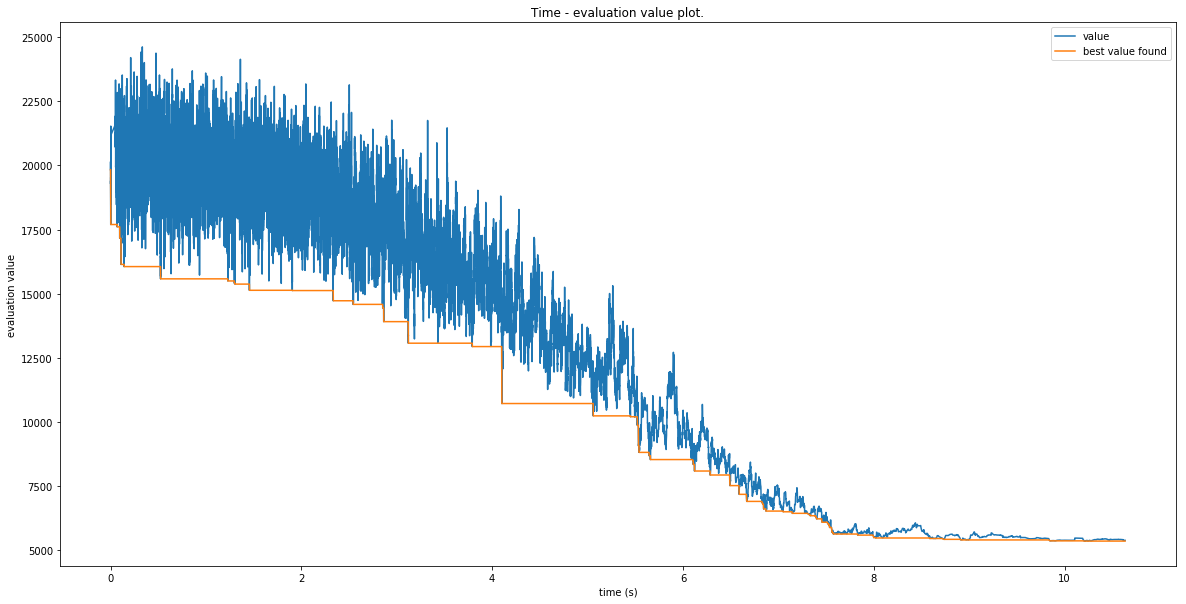

In [5]:
# value-time plot

plot(results_1.data)

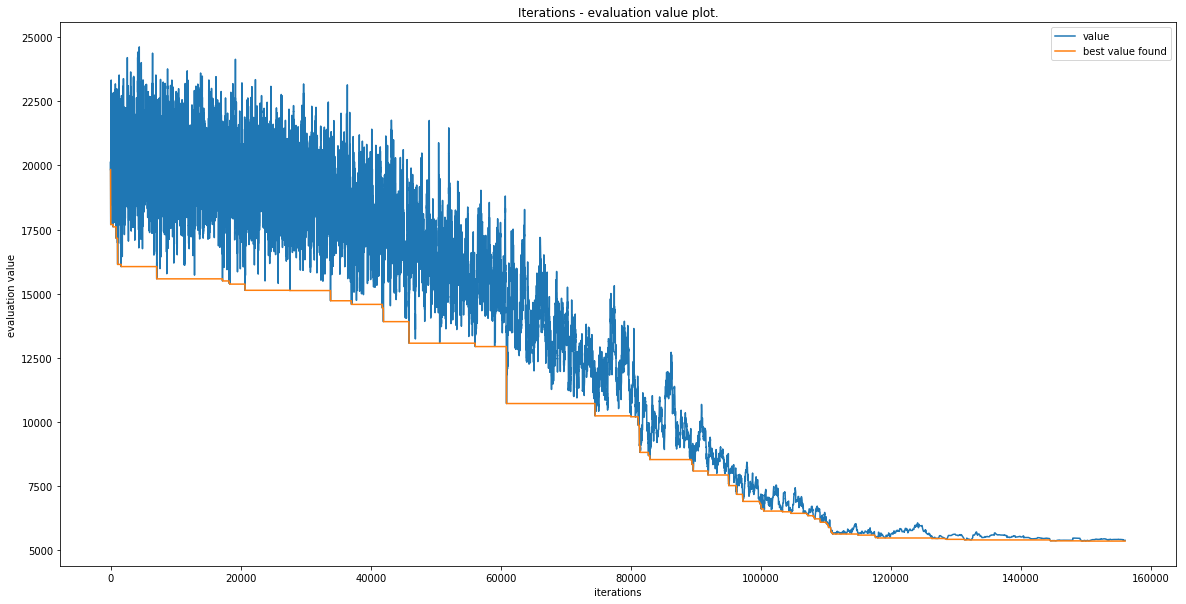

In [6]:
# value-iterations plot

iterations_plot(results_1.data)

### simulated annealing plotting data with matplotlib

In [7]:
# getting data from results (only used for plotting with matplotlib)

data = results_1.data

time = data.time
iterations = data.iteration
temperature = data.temperature
values = data.value
best_values = data.best_value

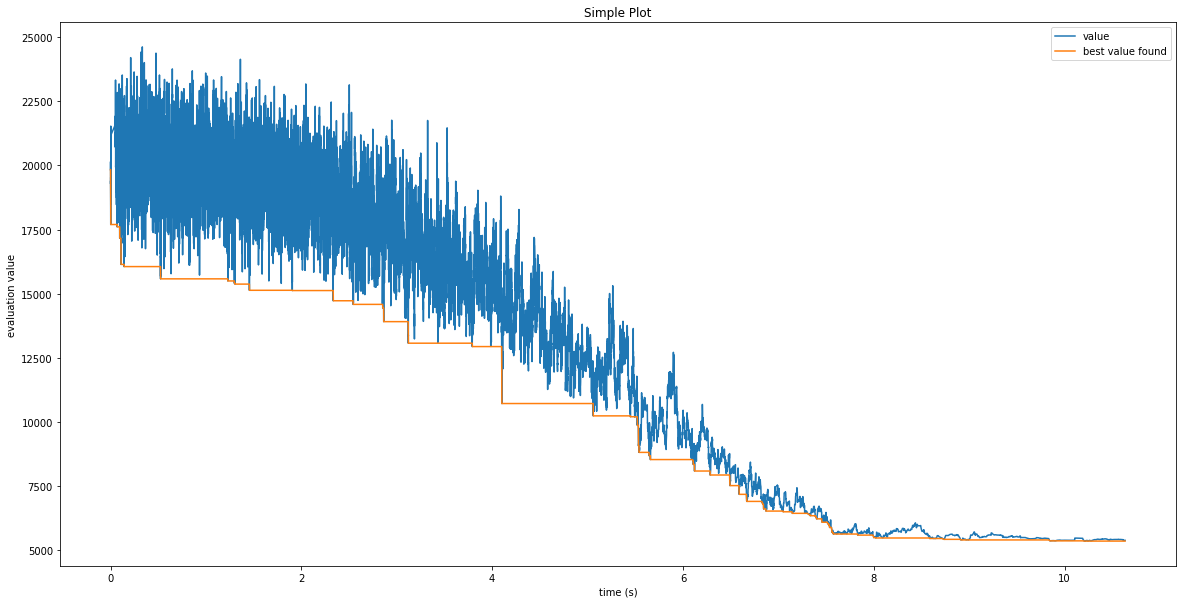

In [8]:
# plotting a value-time plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(time, values,label='value')
plt.plot(time, best_values, label='best value found')

plt.xlabel('time (s)')
plt.ylabel('evaluation value')

plt.title("Simple Plot")

plt.legend()

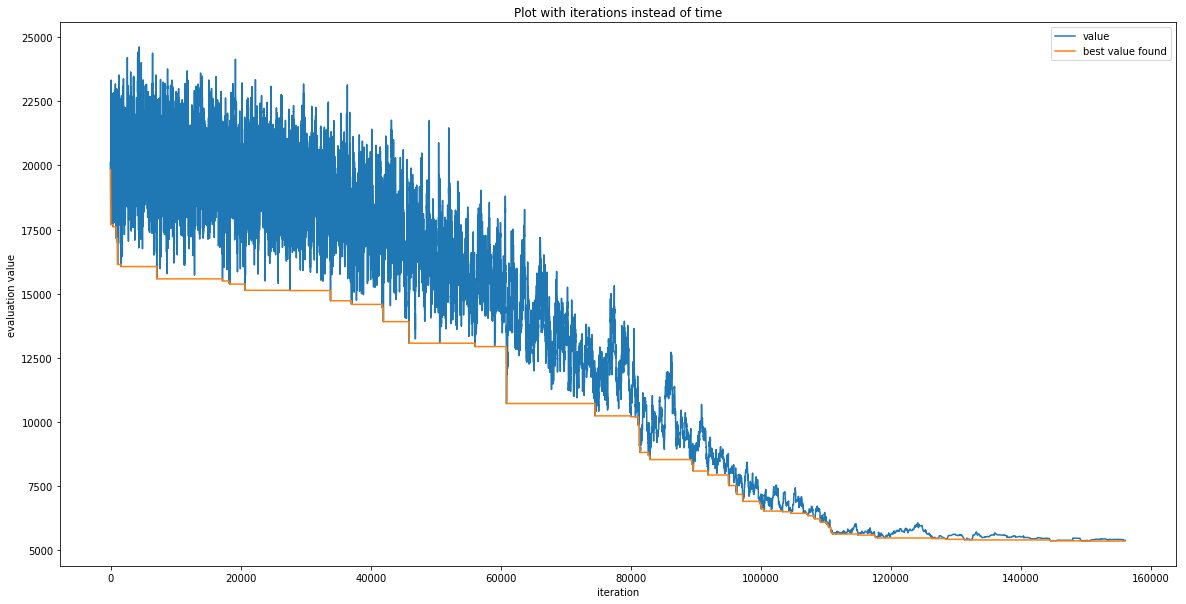

In [9]:
# plotting a value-iteration plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(iterations, values,label='value')
plt.plot(iterations, best_values, label='best value found')

plt.xlabel('iteration')
plt.ylabel('evaluation value')

plt.title("Plot with iterations instead of time")

plt.legend()

Text(0.5, 1.0, 'Temperature in function of the amount of iterations')

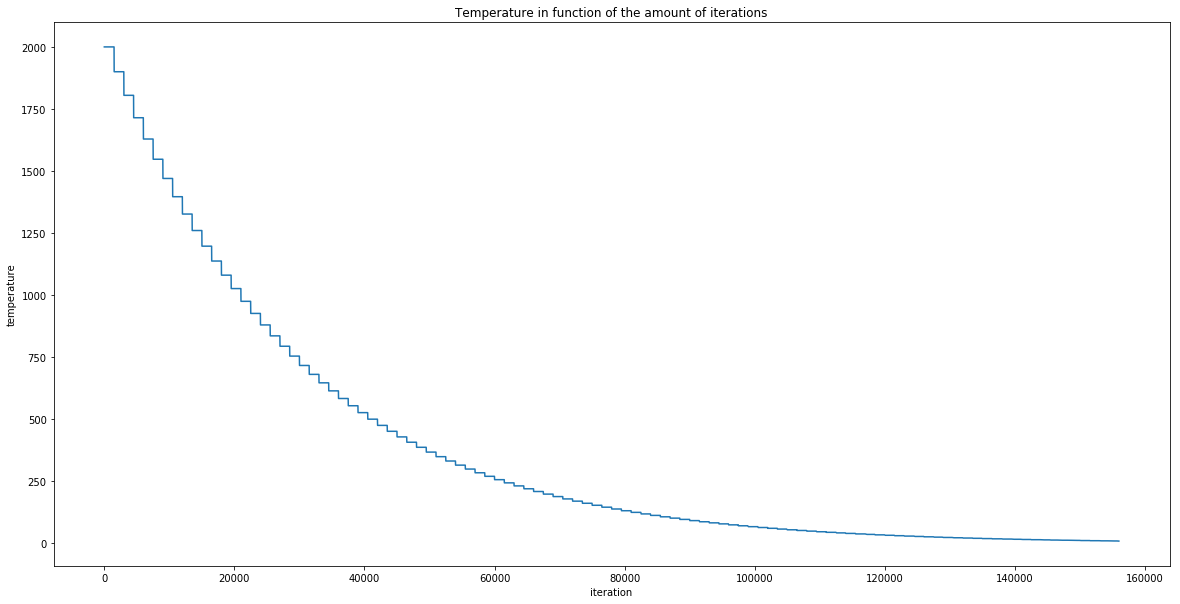

In [10]:
# plotting a temperature-iteration plot with matplotlib

plt.figure(figsize=(20,10))
plt.plot(iterations, temperature)

plt.xlabel('iteration')
plt.ylabel('temperature')

plt.title("Temperature in function of the amount of iterations")

## steepest descent

In [11]:
move_2 = TspArraySwap(size)

evaluation_2 = TspEvaluationFunction(distance_matrix, move_2)

problem_2 = ArrayProblem(evaluation_2, move_2, size)


algorithm_2 = SteepestDescent(problem_2, benchmarking=True)
results_2 = algorithm_2.run()
print(results_2)

Results(best_order=array([ 0, 33, 18,  3,  2, 25,  7, 21,  8, 13, 35, 10,  5, 20, 16, 26, 31,
       46,  1, 19, 37, 29, 24, 40, 43, 28, 12, 15, 47, 14, 32,  4, 30, 11,
        9, 23, 36, 39, 38, 41, 34, 44, 42, 22, 17, 45, 27,  6]), best_value=7073, data=Data(time=array([0.       , 0.068707 , 0.1095694, 0.1558863, 0.2111535, 0.2486824,
       0.2869471, 0.324561 , 0.3790481, 0.4329621, 0.4720489, 0.5093986,
       0.546942 , 0.5883014, 0.6432335, 0.6847924, 0.7254409, 0.7678779,
       0.8152591, 0.852748 , 0.8904668, 0.9324006, 0.9874065, 1.0415142,
       1.0860526, 1.138457 , 1.1866173, 1.2261176, 1.2725604, 1.3117315,
       1.3565193, 1.3939215, 1.4311727, 1.4686057, 1.5077666, 1.5469267,
       1.5844827, 1.6216911, 1.6589392]), iteration=array([ 0,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37]), value=array([19837, 18381, 17226, 16206, 15138, 14149, 13407, 127

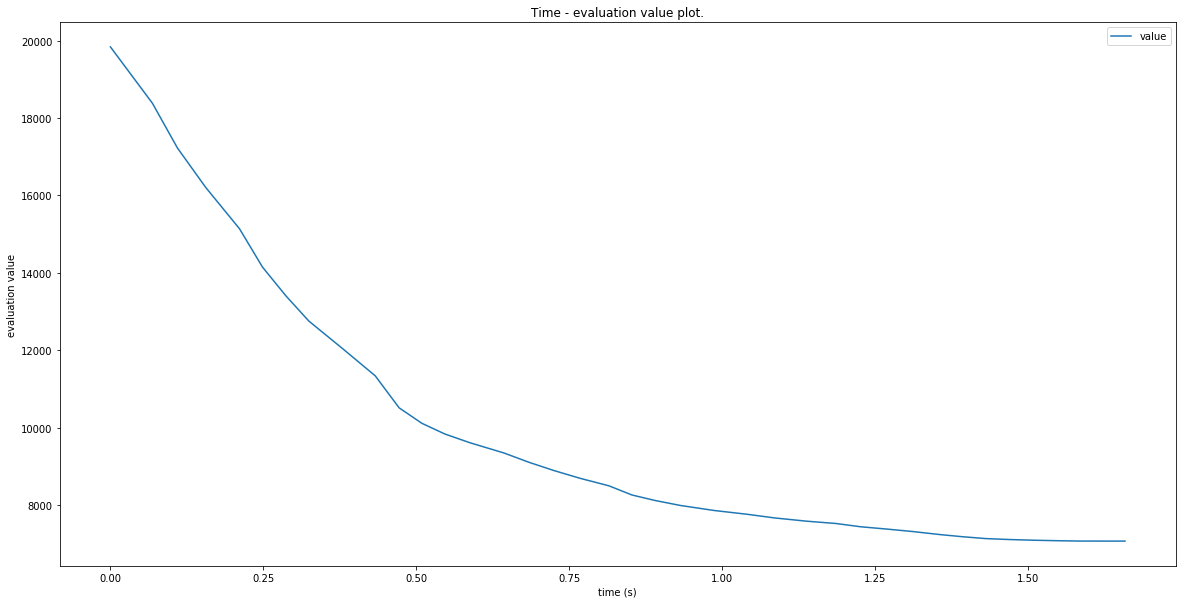

In [12]:
# value-time plot

plot(results_2.data)

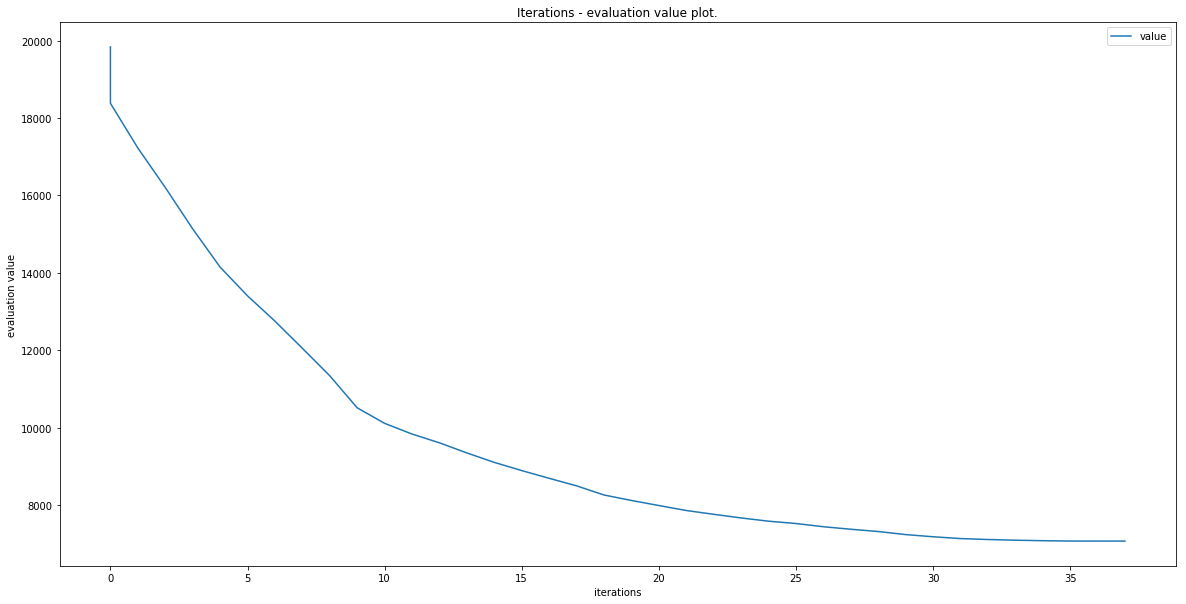

In [13]:
# value-iterations plot

iterations_plot(results_2.data)

## tabu search

In [14]:
move_3 = TspArraySwap(size)

evaluation_3 = TspEvaluationFunction(distance_matrix, move_3)

problem_3 = ArrayProblem(evaluation_3, move_3, size)

termination_3 = MaxSecondsTerminationCriterion(10)


algorithm_3 = TabuSearch(problem_3, termination_3, 11, benchmarking=True)
results_3 = algorithm_3.run()
print(results_3)

Results(best_order=array([ 0,  2, 18,  3, 29,  1, 46, 21,  8, 13,  5, 35, 10, 15, 47, 12,  6,
       27, 45, 33, 22, 24, 17, 25,  7, 20, 16, 26, 31,  4, 11,  9, 30, 32,
       14, 23, 36, 39, 38, 41, 34, 19, 37, 44, 42, 40, 43, 28]), best_value=6350, data=Data(time=array([ 0.       ,  0.1876203,  0.3774275,  0.581868 ,  0.7454379,
        0.9045952,  1.0783136,  1.2780046,  1.4452103,  1.6225377,
        1.781742 ,  1.9424906,  2.1026564,  2.2628188,  2.4244319,
        2.5867992,  2.7536549,  2.9453386,  3.107789 ,  3.2679098,
        3.4466032,  3.6249076,  3.7874266,  3.9573796,  4.1170718,
        4.276218 ,  4.4456566,  4.6081825,  4.770896 ,  4.9320555,
        5.106216 ,  5.2675977,  5.4299533,  5.6026133,  5.7713956,
        5.9316554,  6.0908389,  6.2523195,  6.4292825,  6.5968127,
        6.7613571,  6.92103  ,  7.0810648,  7.2424687,  7.4068943,
        7.5841449,  7.7464594,  7.9062382,  8.0659827,  8.2278852,
        8.4205957,  8.6407815,  8.8093582,  9.0095866,  9.208452

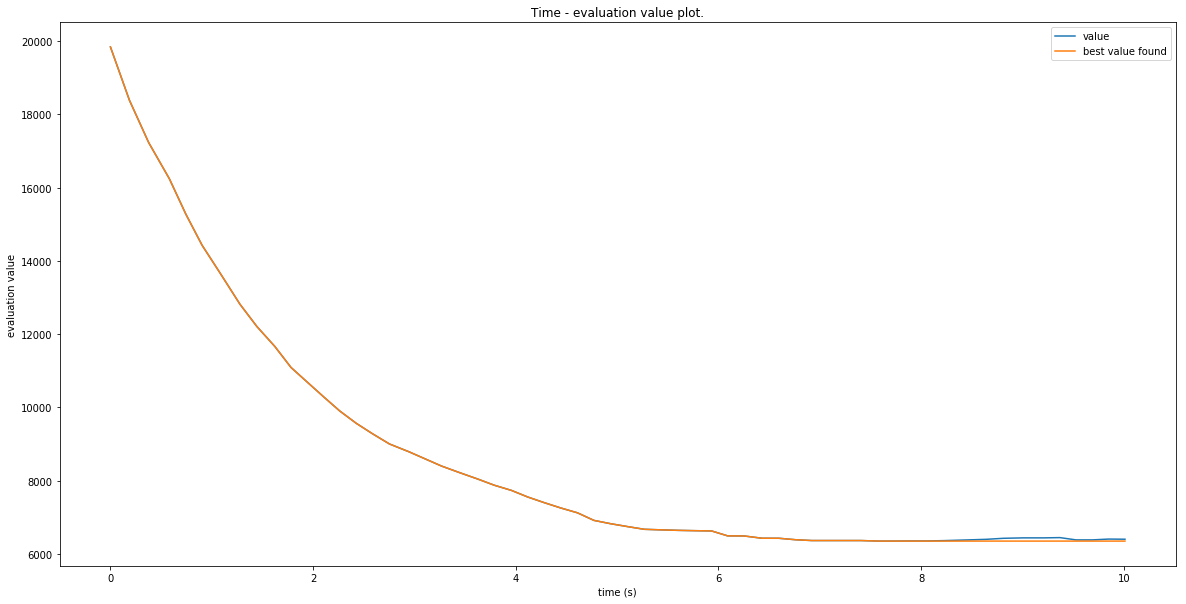

In [15]:
# value-time plot

plot(results_3.data)

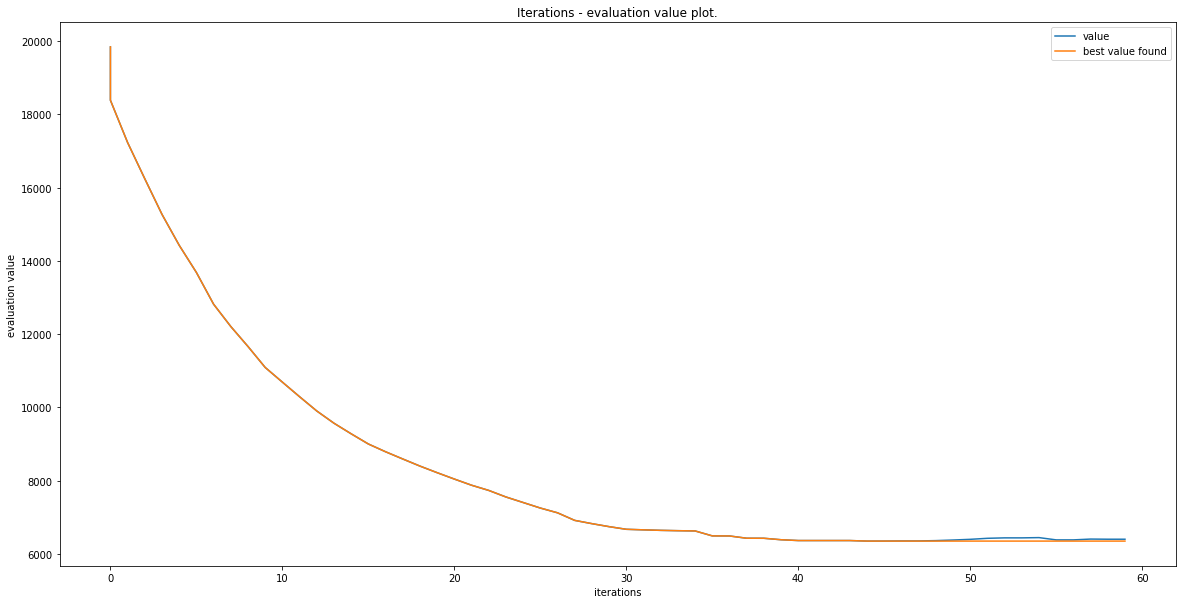

In [16]:
# value-iterations plot

iterations_plot(results_3.data)

## variable neighbourhood search

In [17]:
move_a = TspArraySwap(size)
move_b = ArrayReverseOrder(size)

moves = [move_a, move_b]

move_4 = MultiNeighbourhood(moves)

evaluation_4 = TspEvaluationFunction(distance_matrix, move_4)

problem_4 = ArrayProblem(evaluation_4, move_4, size)


algorithm_4 = VariableNeighbourhood(problem_4, benchmarking=True)
results_4 = algorithm_4.run()
print(results_4)

Results(best_order=array([ 6, 28,  0, 12, 47, 15, 10, 35,  5, 13,  8, 20, 16, 26, 31, 21,  7,
       25, 14, 32,  4, 30, 11,  9, 23, 36, 46, 17, 45, 33, 22, 42, 44,  1,
       39, 38, 41, 34, 19, 37, 29,  3, 18,  2, 24, 40, 43, 27]), best_value=5097, data=Data(time=array([0.       , 0.0691822, 0.1081337, 0.1489577, 0.1963784, 0.2448975,
       0.3272696, 0.4217296, 0.4704842, 0.5153019, 0.5558571, 0.5944881,
       0.6331571, 0.6779457, 0.7466404, 0.8297276, 0.9101804, 0.9899234,
       1.0368575, 1.0790787, 1.1192299, 1.1585426, 1.1984247, 1.2372506,
       1.3059532, 1.3867772, 1.464665 , 1.542274 , 1.6129288, 1.676558 ,
       1.7490916, 1.7969869, 1.8361555, 1.8745194, 1.9128576, 1.9515235,
       1.9903677, 2.0290152, 2.4027976, 2.6218096, 2.6685275, 2.7522173,
       2.8400041, 2.9203795, 2.9814494, 3.0439348, 3.2676304, 3.3063933,
       3.3456492, 3.3875637, 3.4262562, 3.4648986, 3.5035615, 3.5421425,
       3.763672 , 3.810843 , 3.8494712, 4.0713073, 4.289267 , 4.5093407,
    

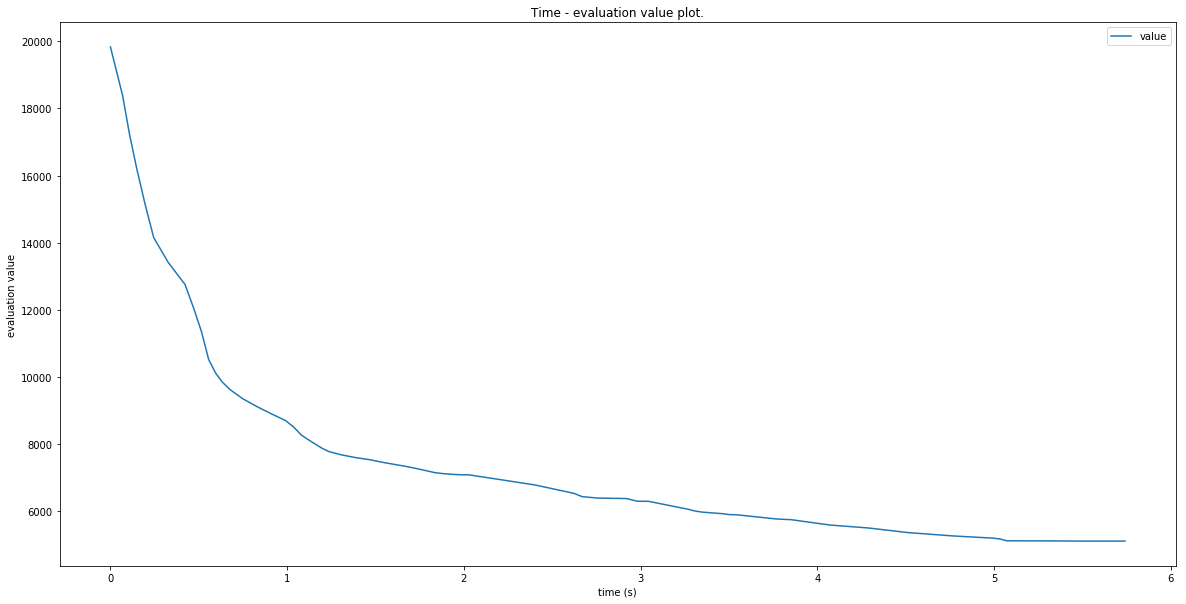

In [18]:
# value-time plot

plot(results_4.data)

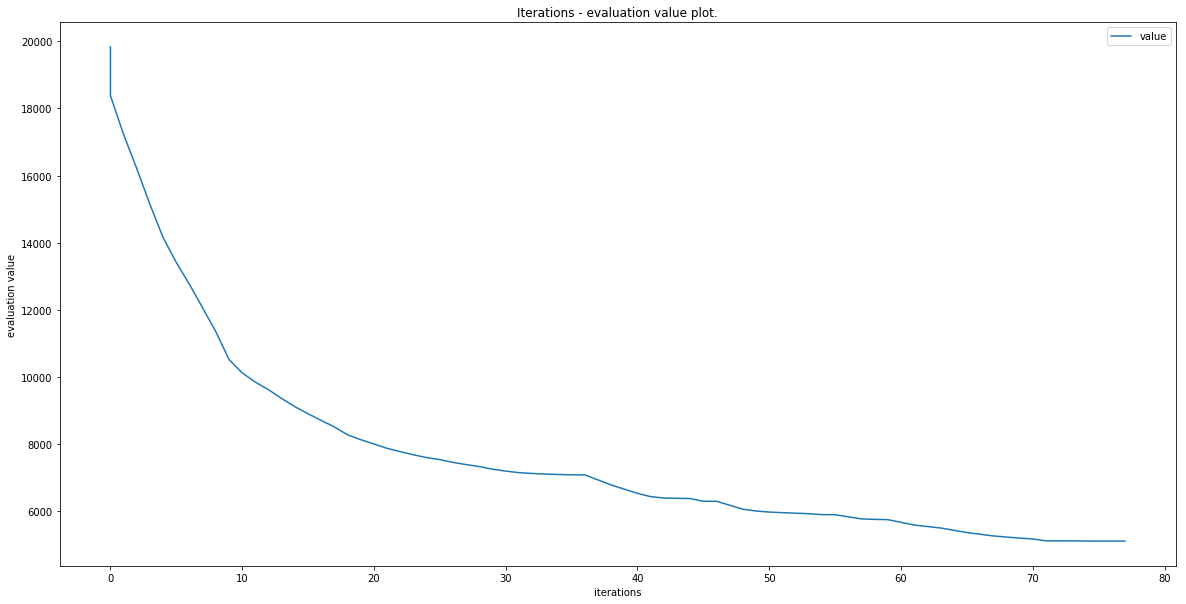

In [19]:
# value-iterations plot

iterations_plot(results_4.data)